In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [2]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [3]:
import pandas as pd

# Create a DataFrame from the nodes_list dictionary
nodes_df = pd.DataFrame(nodes_list).T

# Reset the index and rename the index column to 'Node'
nodes_df.reset_index(inplace=True)
nodes_df.rename(columns={'index': 'Node'}, inplace=True)

# Display the DataFrame
nodes_df


,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(68.59634307479845, 19.758287620518043)",6,0.407391,8.905701,0.033864,88.6197
1,1,"(60.01232407816782, 87.59592304089756)",10,0.357817,14.676725,0.55853,30.013062
2,2,"(24.847467340486283, 36.2121824189246)",4,0.141358,15.216807,0.241383,55.140229
3,3,"(43.56629988853703, 18.029253019503855)",10,0.272259,5.204377,0.937874,99.765925
4,4,"(4.7590248744806445, 5.016196751919666)",1,0.149988,11.073154,0.838915,39.831897
5,5,"(99.23048826639312, 7.733123091304572)",8,0.756632,11.838125,0.355314,14.229082
6,6,"(45.58485774949338, 99.6294833207905)",4,0.406165,10.0182,0.100441,13.917786
7,7,"(75.91181116535445, 94.28893076614946)",1,0.578121,14.531439,0.007445,45.369715
8,8,"(66.99432583802371, 45.89786197445758)",3,0.559011,7.952583,0.774461,22.205807
9,9,"(13.622498036432507, 20.02425920553238)",5,0.464896,11.154227,0.158365,55.421558


In [4]:
nodes_df.to_csv('improved.csv')

In [5]:
df = pd.read_csv('improved.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(68.59634307479845, 19.758287620518043)",6,0.407391,8.905701,0.033864,88.619700
1,1,"(60.01232407816782, 87.59592304089756)",10,0.357817,14.676725,0.558530,30.013062
2,2,"(24.847467340486283, 36.2121824189246)",4,0.141358,15.216807,0.241383,55.140229
3,3,"(43.56629988853703, 18.029253019503855)",10,0.272259,5.204377,0.937874,99.765925
4,4,"(4.7590248744806445, 5.016196751919666)",1,0.149988,11.073154,0.838915,39.831897
5,5,"(99.23048826639312, 7.733123091304572)",8,0.756632,11.838125,0.355314,14.229082
6,6,"(45.58485774949338, 99.6294833207905)",4,0.406165,10.018200,0.100441,13.917786
7,7,"(75.91181116535445, 94.28893076614946)",1,0.578121,14.531439,0.007445,45.369715
8,8,"(66.99432583802371, 45.89786197445758)",3,0.559011,7.952583,0.774461,22.205807
9,9,"(13.622498036432507, 20.02425920553238)",5,0.464896,11.154227,0.158365,55.421558


# Bellman Ford Algo

In [6]:
def bellman_ford_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(
    source, destination, G, nodes_df
):
    if source == destination:
        return [source]

    # Step 1: Initialize distances and predecessor nodes
    dist = {node: float("inf") for node in nodes_df["Node"]}
    dist[source] = 0
    prev = {node: None for node in nodes_df["Node"]}

    # Step 2: Relax edges repeatedly
    for i in range(len(nodes_df) - 1):
        for edge in G.edges():
            u, v = edge
            bandwidth = min(nodes_df.loc[u]["bandwidth"], nodes_df.loc[v]["bandwidth"])
            mobility = max(nodes_df.loc[u]["mobility"], nodes_df.loc[v]["mobility"])
            transmission_power = min(
                nodes_df.loc[u]["transmission_power"], nodes_df.loc[v]["transmission_power"]
            )
            battery_capacity = min(
                nodes_df.loc[u]["battery_capacity"], nodes_df.loc[v]["battery_capacity"]
            )
            packet_loss = max(nodes_df.loc[u]["packet_loss"], nodes_df.loc[v]["packet_loss"])

            if (
                dist[u]
                + (bandwidth - mobility + transmission_power + battery_capacity - packet_loss)
                < dist[v]
            ):
                dist[v] = dist[u] + (
                    bandwidth - mobility + transmission_power + battery_capacity - packet_loss
                )
                prev[v] = u

    # Step 3: Check for negative-weight cycles
    for edge in G.edges():
        u, v = edge
        bandwidth = min(nodes_df.loc[u]["bandwidth"], nodes_df.loc[v]["bandwidth"])
        mobility = max(nodes_df.loc[u]["mobility"], nodes_df.loc[v]["mobility"])
        transmission_power = min(
            nodes_df.loc[u]["transmission_power"], nodes_df.loc[v]["transmission_power"]
        )
        battery_capacity = min(
            nodes_df.loc[u]["battery_capacity"], nodes_df.loc[v]["battery_capacity"]
        )
        packet_loss = max(nodes_df.loc[u]["packet_loss"], nodes_df.loc[v]["packet_loss"])

        if (
            dist[u]
            + (bandwidth - mobility + transmission_power + battery_capacity - packet_loss)
            < dist[v]
        ):
            raise ValueError("Negative weight cycle detected")

    # Step 4: Construct the shortest path from source to destination
    path = [destination]
    node = destination
    while prev[node] is not None:
        path.insert(0, prev[node])
        node = prev[node]

    return path


In [7]:
source = 2
destination = 9
path = bellman_ford_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 6, 9]


In [8]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


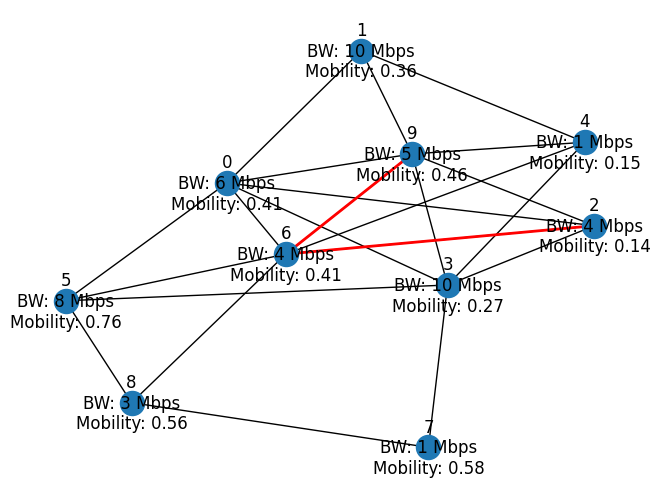

In [9]:
draw_network_graph(G, path, df)

In [10]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))
    
    # Converting the list of dictionaries into a DataFrame
    df1 = pd.DataFrame(data_list)
    return df1


In [11]:
df1 = calculate_avg_health(G, path, df)
df1

avg health of transfer 27.300581806866614


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,2,6,4,0.406165,10.0182,13.917786,0.241383,27.288438
1,6,9,4,0.464896,10.0182,13.917786,0.158365,27.312726


# Dijkstra Algo

In [12]:
def dijkstra_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(
    source, destination, G, nodes_df
):
    if source == destination:
        return [source]

    visited = set()
    queue = [(source, [source])]

    shortest_path = None
    best_score = float("-inf")

    while queue:
        current, path = queue.pop(0)
        visited.add(current)

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                score = (
                    nodes_df.loc[neighbor]["bandwidth"]
                    - nodes_df.loc[neighbor]["mobility"]
                    + nodes_df.loc[neighbor]["transmission_power"]
                    + nodes_df.loc[neighbor]["battery_capacity"]
                    - nodes_df.loc[neighbor]["packet_loss"]
                )
                if score > best_score:
                    best_score = score
                    next_hop = neighbor
                if neighbor == destination:
                    shortest_path = path + [neighbor]
                    return shortest_path
        if best_score > float("-inf"):
            visited.add(next_hop)
            queue.append((next_hop, path + [next_hop]))
            best_score = float("-inf")

    return shortest_path


In [13]:
source = 2
destination = 9
path = dijkstra_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 9]


In [14]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


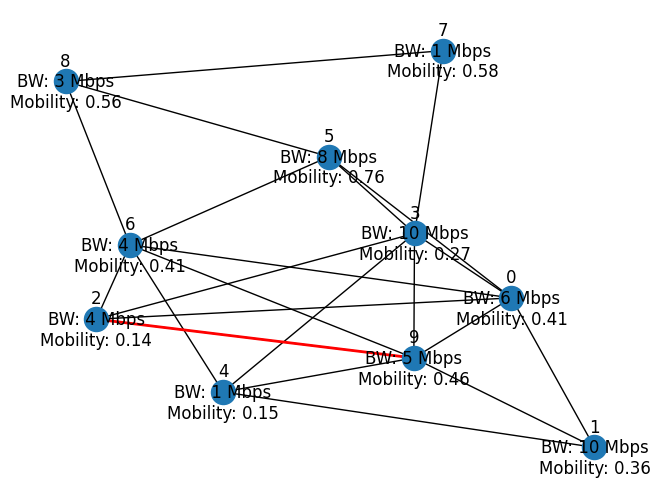

In [15]:
df2 = draw_network_graph(G, path, df)
df2 

In [16]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))
    
    # Converting the list of dictionaries into a DataFrame
    df2 = pd.DataFrame(data_list)
    return df2


In [17]:
df2 = calculate_avg_health(G, path, df)
df2 

avg health of transfer 69.58817823216495


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,2,9,4,0.464896,11.154227,55.140229,0.241383,69.588178


# Genetic Algo

In [18]:
import random
import numpy as np
import networkx as nx


def genetic_algorithm_dijkstra_shortest_path(source, destination, G, nodes_df):
    population_size = 50
    num_generations = 100
    mutation_probability = 0.1

    def generate_individual():
        return [random.randint(0, len(nodes_df) - 1) for _ in range(random.randint(1, len(nodes_df) - 1))]

    def calculate_fitness(individual):
        fitness = 0
        for i in range(len(individual) - 1):
            start_node = individual[i]
            end_node = individual[i + 1]
            node_props = nodes_df.loc[start_node]
            fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
                'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        node_props = nodes_df.loc[individual[-1]]
        fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
            'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
        return fitness

    def selection(population):
        fitnesses = [calculate_fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        indices = np.random.choice(range(len(population)), size=len(population), p=probabilities)
        return [population[index] for index in indices]

    def crossover(parent1, parent2):
        if len(parent1) > 1 and len(parent2) > 1:
            crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            return child1, child2
        else:
            return parent1, parent2

    def mutation(individual):
        if random.random() < mutation_probability:
            index1 = random.randint(0, len(individual) - 1)
            index2 = random.randint(0, len(nodes_df) - 1)
            individual[index1] = index2

    population = [generate_individual() for _ in range(population_size)]
    for generation in range(num_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)
        population = new_population

    best_individual = min(population, key=calculate_fitness)
    best_path = [source] + best_individual + [destination]
    return best_path


In [19]:
source = 2
destination = 9
path = genetic_algorithm_dijkstra_shortest_path(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 2, 5, 3, 0, 6, 0, 3, 0, 3, 9]


In [20]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


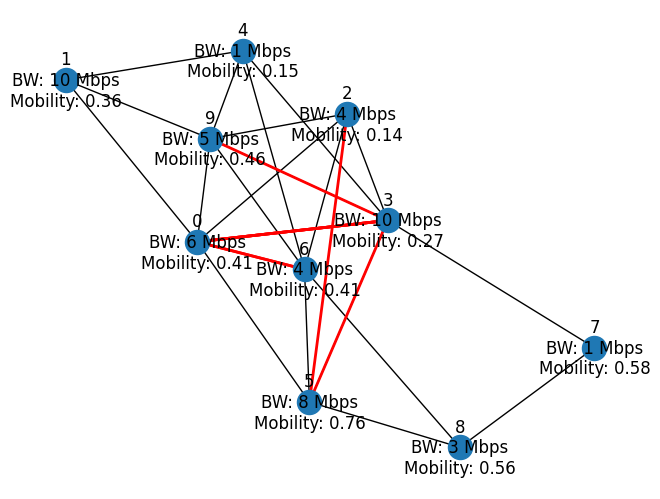

In [21]:
df2 = draw_network_graph(G, path, df)
df2 

In [22]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    # Initializing all variables to 0
    bandwidth = 0
    mobility = 0
    transmission_power = 0
    battery_capacity = 0
    packet_loss = 0
    health = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))

    # Converting the list of dictionaries into a DataFrame
    df3 = pd.DataFrame(data_list)
    return df3


In [23]:
df3 = calculate_avg_health(G, path, df)
df3 

avg health of transfer 67.06358447392385


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,5,3,8,0.756632,5.204377,14.229082,0.937874,25.738953
1,3,0,6,0.407391,5.204377,88.619700,0.937874,98.478812
2,0,6,4,0.407391,8.905701,13.917786,0.100441,26.315655
3,6,0,4,0.407391,8.905701,13.917786,0.100441,26.315655
4,0,3,6,0.407391,5.204377,88.619700,0.937874,98.478812
5,3,0,6,0.407391,5.204377,88.619700,0.937874,98.478812
6,0,3,6,0.407391,5.204377,88.619700,0.937874,98.478812
7,3,9,5,0.464896,5.204377,55.421558,0.937874,64.223166
